### Name- Soumya Bansal
## GRIPJUN22 Internship Project Task1- Prediction using Supervised Machine Learning

**Aim- Predict the percentage of students based on the number of study hours using Supervised Learning**

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Reading data

In [2]:
df= pd.read_csv('http://bit.ly/w-data')

### Exploring data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking for null values if any 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the data to find the relationship between 'Hours' and 'Scores'

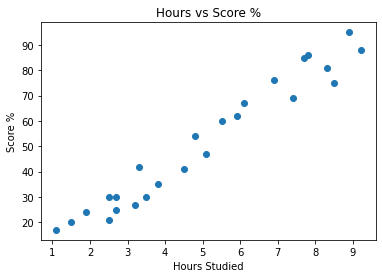

In [7]:
plt.title('Hours vs Score %')
plt.xlabel('Hours Studied')
plt.ylabel('Score %')
plt.scatter(df['Hours'],df['Scores'])

**From the above graph it is clear that there is a positive linear relation between the number of hours studied and percentage of score.**

### Checking for outliers

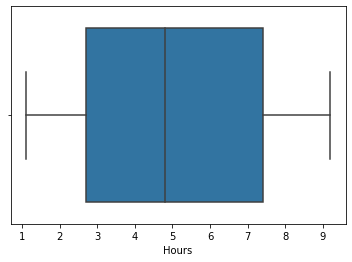

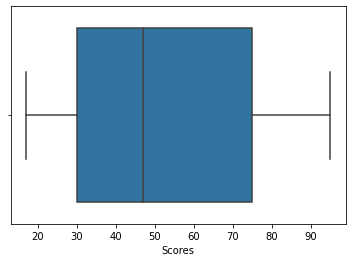

In [8]:
import seaborn as sb
sb.boxplot(x=df['Hours'])
plt.show()

sb.boxplot(x=df['Scores'])
plt.show()

**From the above plots it is clear that there are no outliers present in the data.**

### Preparing and splitting the data into training and testing sets

In [9]:
X=df['Hours']
y=df['Scores']
X.shape, y.shape

((25,), (25,))

In [10]:
X=np.array(X)
y=np.array(y)

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20,), (5,), (20,), (5,))

In [13]:
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

### Training the model using Linear Regression Algorithm

In [14]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Making Prediction on the testing set

In [15]:
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
print(y_test)

[[20]
 [27]
 [69]
 [30]
 [62]]


In [17]:
print("Predicted test values", y_pred)

Predicted test values [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


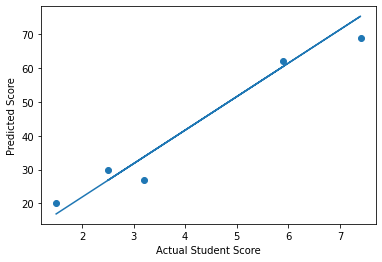

In [18]:
# Plotting the regression line
%matplotlib inline
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred);
plt.xlabel('Actual Student Score')
plt.ylabel('Predicted Score')
plt.show()

### Model Evaluation 

In [19]:
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [20]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


In [21]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4.6474476121003665


In [22]:
print("R2 Score:", metrics.r2_score(y_test, y_pred))

R2 Score: 0.9454906892105356


### Mean absolute error is 4.2% and r2_score (model accuracy score) is 94.44%

In [23]:
hours= 9.25
print("Score of the student who studied for 9.25 hours per day is: ", reg.predict([[hours]]))

Score of the student who studied for 9.25 hours per day is:  [[93.69173249]]


### Result: As per prediction if a student studies for 9.25 hours daily, he/she is likely to get 93.69%. 